<a href="https://colab.research.google.com/github/jhj1819/Machine-learning/blob/main/ModelTuning1028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
 path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
 df = pd.read_csv(path, header=None)

.data로 끝나는 데이터에는 header가 없음

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 특성이 많다고 무조건 도움이 되는것은 아님.
- x끼리 서로 연관이 있다면 성능이 하락함

컬럼 이름을 모르니까 drop() 대신 iloc

In [4]:
X = df.iloc[:,2:]

In [5]:
X.shape

(569, 30)

pandas로 쓸 이유가 없으므로 numpy로(.values)

In [6]:
X = df.iloc[:,2:].values

In [7]:
X.shape

(569, 30)

In [8]:
y = df.iloc[:,1].values

In [9]:
y.shape

(569,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,
                                                    stratify =y, random_state=1)

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

클래스 분포 파악
- pandas에서는 value_count()
- numpy에서는 unique() , return_counts=True: 개수도 알려줌

In [19]:
unique_values, counts = np.unique(y_train, return_counts=True)
print(unique_values)
print(counts) # 문제될정도의 불균형은 아님

[0 1]
[285 170]


과제2에서 정확도는 준수하지만 정밀도와 재현율은 0에 가까웠음
- 클래스 불균형의 문제
> - 적은 클래스에 가중치를 준다
> - 많은 클래스를 제거해서 균형을 맞춘다(?)

정오분류표에서 측도를 구할때 가중치를 똑같이 뒀음
- 음성을 양성으로 구분하는것과, 양성을 음성으로 구분하는것을 똑같이 여김(실제론 음성을 양성으로 구분하는게 더 중요함)

위 데이터는 특성이 매우 많음
- x는 y와 연관이 높아야함
- x끼리는 연관이 낮아야함

특성이 매우 많을때
- 좋은 특성은 남기고, 나머지는 뺌. (어렵고 복잡함)
- 모든 특성을 다 가지고, 새로운 특성을 만들어냄 -> **특성추출**
- PCA: 차원축소 : 특성추출의 대표적 알고리즘

차원이 커질수록 데이터간 거리가 멀어짐.. (희소해짐)
-> 차원축소 필요

주성분 분석
데이터를 가장 잘 설명하는 축을 뽑아냄 <- 첫번째 주성분


두번째 주성분은 첫번째 주성분과 연관이 적어야함 = (상관계수 0 , 독립적(직각)).. 직각인걸 뽑아냄.
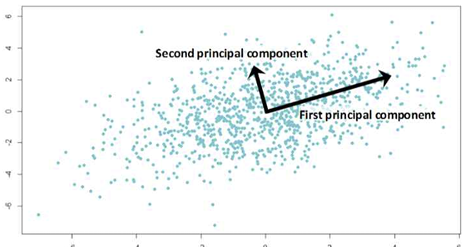

- n_components : 추출하고자 하는 주성분 개수
- explained_variance_ratio : 주성분으로 설명되는 분산의 비율
- PCA 사용시 표준화 필요

In [20]:
# 특성 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [22]:
# PCA 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분 2개 추출
pca.fit(X_train_std)
pca.components_ # 전치 투영 행렬, shape = (2,30)

array([[ 0.21679334,  0.10660312,  0.22557851,  0.21886594,  0.14066045,
         0.23936605,  0.25444238,  0.25775276,  0.14120408,  0.07237829,
         0.20600989,  0.01378187,  0.21367988,  0.20798454,  0.00307547,
         0.17102664,  0.14768555,  0.18439201,  0.04163771,  0.10122214,
         0.226975  ,  0.10755498,  0.23567844,  0.2237171 ,  0.12867934,
         0.21426764,  0.2282569 ,  0.24993858,  0.12582219,  0.13879824],
       [-0.23462306, -0.06849448, -0.2151757 , -0.23224295,  0.1848655 ,
         0.14475358,  0.06573624, -0.03731318,  0.18138941,  0.3662257 ,
        -0.09883883,  0.0763412 , -0.07861921, -0.15183423,  0.2049454 ,
         0.2377156 ,  0.20931191,  0.1409671 ,  0.19936217,  0.2828757 ,
        -0.22124091, -0.06136208, -0.20066026, -0.22093973,  0.15776067,
         0.13415898,  0.09876787, -0.00967411,  0.13847033,  0.26770452]])

In [31]:
pca.explained_variance_ratio_ # 처음 두 주성분으로 설명되는 분산의 비율: 총 63%
# 첫번째 주성분: 45%, 두번째 18%

array([0.45254431, 0.1855675 ])

In [32]:
# PCA 변환
X_train_std_pca = pca.transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

In [33]:
X_train_std_pca.shape # 2차원으로 변함. (30개중 합쳐서 2개로 만들었다.)

(455, 2)

In [30]:
import matplotlib.pyplot as plt

- 30개를 가지고 로지스틱 -> 98%
- 2개를 가지고 로지스틱 -> 95%
- 30개를 가지고 만든게 더 높지만, 2개만을 가지고도 그에 준하는 성능을 보였다.

# 파이프라인

여러 변환기 or 추정기들을 모아서 한번에 하도록 할 수 있음

ex) StandardScaler -> PCA -> LogisticRegression

In [36]:
from sklearn.pipeline import make_pipeline

sklearn.compose.ColumnTransformer를 사용하면, 수치형/범주형 칼럼 이름 리스트에
대한 전처리 파이프라인 구축 가능(이런것도있더라..)